# (Ford GoBike System Dateset)
## by (Ahmed Awad)

## Preliminary Wrangling

> This data set includes information about individual rides made
in a bike-sharing system covering the greater San Francisco
Bay area, the dataset used for this exploratory analysis consists of monthly individual trip data from January 2019 to December 2019 in CSV format covering the greater San Francisco Bay area, available here: https://s3.amazonaws.com/baywheels-data/index.html

In [3]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os
from glob import glob

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
# merge all the datasets from jun 2019 to dec 2019 in one csv file
Data = glob(r"E:\Ahmed\Udacity\Advanced Data Analysis\4.Data Visualization\Project\Final\Data\*.csv")

df_list = []
for filename in sorted(Data):
    df_list.append(pd.read_csv(filename))
    full_df = pd.concat(df_list)
    
# save the final file in same directory:
full_df.to_csv(r"E:\Ahmed\Udacity\Advanced Data Analysis\4.Data Visualization\Project\Final\Data\full_data.csv", index=False)

C:\Users\Ahmed\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\Ahmed\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  import sys
C:\Users\Ahmed\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\Ahmed\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or

In [4]:
df = pd.read_csv("Data/full_data.csv")
df.head()

C:\Users\Ahmed\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (1,8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,rental_access_method,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type
0,4861,No,80825,196.0,37.808894,-122.256460,Grand Ave at Perkins St,2019-02-01 16:24:49.8640,NaN,229.0,37.775745,-122.213037,Foothill Blvd at 42nd Ave,2019-01-31 17:57:44.6130,Subscriber
1,5506,No,65900,134.0,37.752428,-122.420628,Valencia St at 24th St,2019-02-01 15:16:54.1730,NaN,4.0,37.785881,-122.408915,Cyril Magnin St at Ellis St,2019-01-31 20:58:33.8860,Subscriber
2,2717,No,62633,157.0,37.846784,-122.291376,65th St at Hollis St,2019-02-01 11:30:46.5300,NaN,245.0,37.870139,-122.268422,Downtown Berkeley BART,2019-01-31 18:06:52.9240,Customer
3,4557,No,44680,53.0,37.775946,-122.437777,Grove St at Divisadero,2019-02-01 08:10:50.3180,NaN,85.0,37.770083,-122.429156,Church St at Duboce Ave,2019-01-31 19:46:09.7190,Customer
4,2100,No,60709,28.0,37.787168,-122.388098,The Embarcadero at Bryant St,2019-02-01 07:10:51.0650,NaN,16.0,37.794130,-122.394430,Steuart St at Market St,2019-01-31 14:19:01.5410,Customer


In [4]:
df.shape

(2506983, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506983 entries, 0 to 2506982
Data columns (total 15 columns):
bike_id                    int64
bike_share_for_all_trip    object
duration_sec               int64
end_station_id             float64
end_station_latitude       float64
end_station_longitude      float64
end_station_name           object
end_time                   object
rental_access_method       object
start_station_id           float64
start_station_latitude     float64
start_station_longitude    float64
start_station_name         object
start_time                 object
user_type                  object
dtypes: float64(6), int64(2), object(7)
memory usage: 286.9+ MB


In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().sum()

bike_id                          0
bike_share_for_all_trip     243259
duration_sec                     0
end_station_id               82902
end_station_latitude             0
end_station_longitude            0
end_station_name             82350
end_time                         0
rental_access_method       2386145
start_station_id             80734
start_station_latitude           0
start_station_longitude          0
start_station_name           80133
start_time                       0
user_type                        0
dtype: int64

In [6]:
df_clean = df.copy()

In [7]:
# drop not needed column with too much null values
df_clean.drop(['rental_access_method'], axis=1);

In [8]:
df_clean.shape

(2506983, 15)

In [9]:
#correct the columns data types:
df_clean['start_time'] = pd.to_datetime(df_clean['start_time'])
df_clean['end_time'] = pd.to_datetime(df_clean['end_time'])

df_clean['start_station_id'] = df_clean['start_station_id'].astype('str')
df_clean['end_station_id'] = df_clean['end_station_id'].astype('str')
df_clean['bike_id'] = df_clean['bike_id'].astype('str')

df_clean['user_type'] = df_clean['user_type'].astype('category')

df_clean.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506983 entries, 0 to 2506982
Data columns (total 15 columns):
bike_id                    2506983 non-null object
bike_share_for_all_trip    2263724 non-null object
duration_sec               2506983 non-null int64
end_station_id             2506983 non-null object
end_station_latitude       2506983 non-null float64
end_station_longitude      2506983 non-null float64
end_station_name           2424633 non-null object
end_time                   2506983 non-null datetime64[ns]
rental_access_method       120838 non-null object
start_station_id           2506983 non-null object
start_station_latitude     2506983 non-null float64
start_station_longitude    2506983 non-null float64
start_station_name         2426850 non-null object
start_time                 2506983 non-null datetime64[ns]
user_type                  2506983 non-null category
dtypes: category(1), datetime64[ns](2), float64(4), int64(1), object(7)
memory usage: 270.2+ MB


In [10]:
#add columns for trip duration in minute, trip start date in yyyy-mm-dd format, trip start hour of the day, day of week and month

df_clean['duration_minute'] = df_clean['duration_sec']/60

df_clean['start_date'] = df_clean.start_time.dt.strftime('%Y-%m-%d')
df_clean['start_hourofday'] = df_clean.start_time.dt.strftime('%H')
df_clean['start_dayofweek'] = df_clean.start_time.dt.strftime('%A')
df_clean['start_month'] = df_clean.start_time.dt.strftime('%B')

df_clean.head()

,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,rental_access_method,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type,duration_minute,start_date,start_hourofday,start_dayofweek,start_month
0,4861,No,80825,196.0,37.808894,-122.256460,Grand Ave at Perkins St,2019-02-01 16:24:49.864,NaN,229.0,37.775745,-122.213037,Foothill Blvd at 42nd Ave,2019-01-31 17:57:44.613,Subscriber,1347.083333,2019-01-31,17,Thursday,January
1,5506,No,65900,134.0,37.752428,-122.420628,Valencia St at 24th St,2019-02-01 15:16:54.173,NaN,4.0,37.785881,-122.408915,Cyril Magnin St at Ellis St,2019-01-31 20:58:33.886,Subscriber,1098.333333,2019-01-31,20,Thursday,January
2,2717,No,62633,157.0,37.846784,-122.291376,65th St at Hollis St,2019-02-01 11:30:46.530,NaN,245.0,37.870139,-122.268422,Downtown Berkeley BART,2019-01-31 18:06:52.924,Customer,1043.883333,2019-01-31,18,Thursday,January
3,4557,No,44680,53.0,37.775946,-122.437777,Grove St at Divisadero,2019-02-01 08:10:50.318,NaN,85.0,37.770083,-122.429156,Church St at Duboce Ave,2019-01-31 19:46:09.719,Customer,744.666667,2019-01-31,19,Thursday,January
4,2100,No,60709,28.0,37.787168,-122.388098,The Embarcadero at Bryant St,2019-02-01 07:10:51.065,NaN,16.0,37.794130,-122.394430,Steuart St at Market St,2019-01-31 14:19:01.541,Customer,1011.816667,2019-01-31,14,Thursday,January


In [11]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506983 entries, 0 to 2506982
Data columns (total 20 columns):
bike_id                    object
bike_share_for_all_trip    object
duration_sec               int64
end_station_id             object
end_station_latitude       float64
end_station_longitude      float64
end_station_name           object
end_time                   datetime64[ns]
rental_access_method       object
start_station_id           object
start_station_latitude     float64
start_station_longitude    float64
start_station_name         object
start_time                 datetime64[ns]
user_type                  category
duration_minute            float64
start_date                 object
start_hourofday            object
start_dayofweek            object
start_month                object
dtypes: category(1), datetime64[ns](2), float64(5), int64(1), object(11)
memory usage: 365.8+ MB


In [12]:
df_clean.to_csv(r"E:\Ahmed\Udacity\Advanced Data Analysis\4.Data Visualization\Project\Final\Data\fordgobike_trips_2019_clean.csv", index=False)

### What is the structure of your dataset?

Each trip is anonymized and includes:

- Trip Duration (seconds)
- Start Time and Date
- End Time and Date
- Start Station ID
- Start Station Name
- Start Station Latitude
- Start Station Longitude
- End Station ID
- End Station Name
- End Station Latitude
- End Station Longitude
- Bike ID
- User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)
- Member Year of Birth
- Member Gender

### What are the main features of interest in your dataset?

  - Trip Duration
  - Member Info


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Each trip's start date/time and duration information will help understanding how long a trip usually takes and when. The member information like user type will help us find out who are the main target customer groups, use the different groups to summarize bike usage data to see if there is any special pattern associated with a specific group of riders.

## Univariate Exploration

> Firstly, explore the trips distribution:

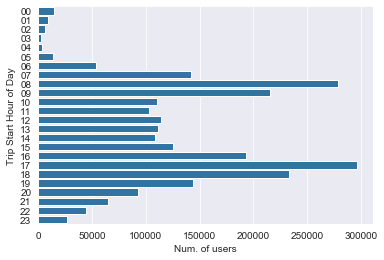

In [21]:
# trip distribution over day hours
base_color = sb.color_palette()[0]
sb.set_style("darkgrid")
sb.countplot(data=df_clean, y='start_hourofday', color=base_color);
plt.ylabel('Trip Start Hour of Day');
plt.xlabel('Num. of users');

Trip Start Hour of Day with Number of users

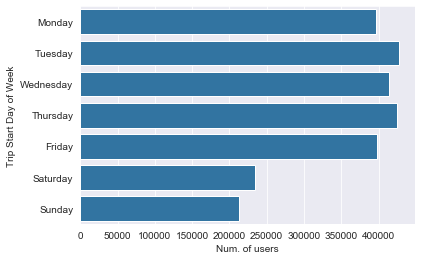

In [22]:
# trip distribution over weekdays
# cast 'start_dayofweek' to ordered category dtype
weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekdaycat = pd.api.types.CategoricalDtype(ordered=True, categories=weekday)
df_clean['start_dayofweek'] = df_clean['start_dayofweek'].astype(weekdaycat)
sb.set_style("darkgrid")
sb.countplot(data=df_clean, y='start_dayofweek', color=base_color);
plt.ylabel('Trip Start Day of Week');
plt.xlabel('Num. of users');

Trip Start Day of Week with Number of users

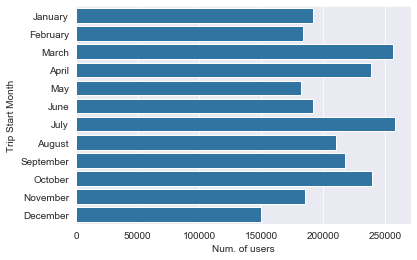

In [23]:
# trip distribution over months
# cast 'start_month' to ordered category dtype
month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthcat = pd.api.types.CategoricalDtype(ordered=True, categories=month)
df_clean['start_month'] = df_clean['start_month'].astype(monthcat)
sb.set_style("darkgrid")
sb.countplot(data=df_clean, y='start_month', color=base_color);
plt.ylabel('Trip Start Month');
plt.xlabel('Num. of users');

The trip distribution over day hours peaks around two timeframes, 8am-9am and 17pm-18pm, during typical rush hours. Looking in combined with the trip distribution over day of week plot, it is quite obvious that the majority of rides happened on work days (Mon-Fri) and primary usage is probably for commuting. In the 12 months in 2019, July had the most ride trips compared to the others, but overall it was the most popular during summer time (May-Sept), and in March and April probably due to the weather in the area.

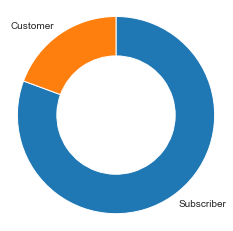

In [24]:
sorted_counts = df_clean['user_type'].value_counts()

plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False, wedgeprops = {'width' : 0.4});
plt.axis('square');

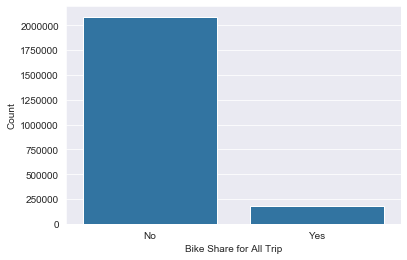

In [25]:
sb.countplot(data=df_clean, x='bike_share_for_all_trip', color=base_color);
plt.xlabel('Bike Share for All Trip');
plt.ylabel('Count');

> next, plot duration distribution:

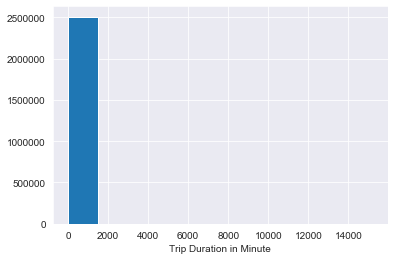

In [26]:
plt.hist(data=df_clean, x='duration_minute');
plt.xlabel('Trip Duration in Minute');

The majority of the rides were quite short (within 200 mins).

> Next, zoom into the most cases for a closer picture of what the distribution is like:

In [27]:
df_clean['duration_minute'].describe(percentiles=[0.99])

count    2.506983e+06
mean     1.346081e+01
std      3.291190e+01
min      1.000000e+00
50%      9.516667e+00
99%      6.876667e+01
max      1.520183e+04
Name: duration_minute, dtype: float64

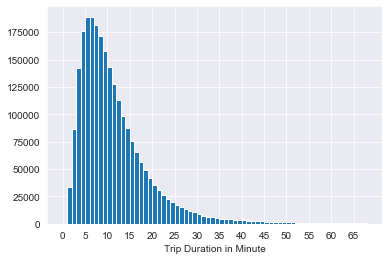

In [28]:
bins = np.arange(0, 69, 1)
ticks = np.arange(0, 69, 5)
plt.hist(data=df_clean, x='duration_minute', bins=bins);
plt.xticks(ticks, ticks);
plt.xlabel('Trip Duration in Minute');

It looks like 99% of the trips were less than 1 hour long with most of them fell between 5 to 10 minutes range.

> Remove the outlier long trips to allow focusing on the most common cases:

In [29]:
# filter out outlier trip records where the duration was very long
df_clean = df_clean.query('duration_minute <= 69')
df_clean.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2482023 entries, 6 to 2506982
Data columns (total 20 columns):
bike_id                    2482023 non-null object
bike_share_for_all_trip    2241128 non-null object
duration_sec               2482023 non-null int64
end_station_id             2482023 non-null object
end_station_latitude       2482023 non-null float64
end_station_longitude      2482023 non-null float64
end_station_name           2400910 non-null object
end_time                   2482023 non-null datetime64[ns]
rental_access_method       119440 non-null object
start_station_id           2482023 non-null object
start_station_latitude     2482023 non-null float64
start_station_longitude    2482023 non-null float64
start_station_name         2402968 non-null object
start_time                 2482023 non-null datetime64[ns]
user_type                  2482023 non-null category
duration_minute            2482023 non-null float64
start_date                 2482023 non-null object

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The number of trips peaked around 8-9am and 17-18pm during a day, there were more trips on work days (Mon-Fri) compared to weekends. Summar time was the most popular season of a year, likely due to the weather.

> Most rides were quick and short, lasted between 5 to 10 minutes, though there were some very long outliers like 24hrs.

> No transformation was needed luckily due to the straightforwardness of the data.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The distribution of the trip duration was surprising at first plotting out the original data. then using .describe() and xticks() to zoom in to a smaller range where most trip records fell, which made the distribution much clearer. In order to help focusing on the main cases of typical use of the system, I filtered out the outlier long trip records for the study with .query().

## Bivariate Exploration

> How does the trip duration distribution vary between customers and subscribers?

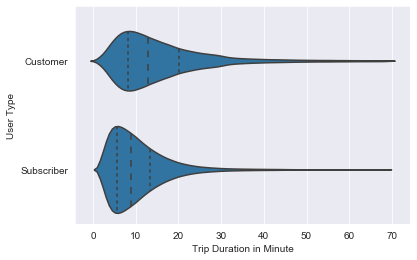

In [30]:
sb.violinplot(data=df_clean, y='user_type', x='duration_minute', color=base_color, inner='quartile');
plt.ylabel('User Type');
plt.xlabel('Trip Duration in Minute');

The trip duration distribution is much narrower for subscribers compared to casual riders on the shorter/quicker trip end overall. It seems like subscribers have a more specific usage or targeted goal riding the bikes compared to customers who vary more and generally rented the bikes for longer.

Average Trip Duration on Weekdays:

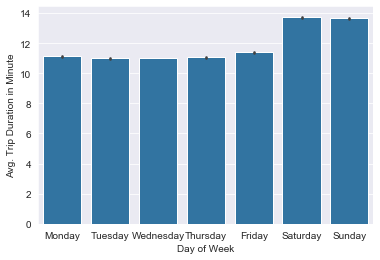

In [31]:
sb.barplot(data=df_clean, x='start_dayofweek', y='duration_minute', color=base_color);
plt.xlabel('Day of Week');
plt.ylabel('Avg. Trip Duration in Minute');

The riding trips are much shorter on Monday through Friday compared to weekends. It indicates a pretty stable and efficient usage of the sharing system on normal work days, while more casual flexible use on weekends.

Average trip duration by month:

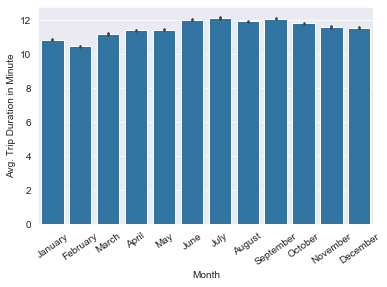

In [32]:
sb.barplot(data=df_clean, x='start_month', y='duration_minute', color=base_color);
plt.xticks(rotation=35);
plt.xlabel('Month');
plt.ylabel('Avg. Trip Duration in Minute');

Starting from March, the average usage time shown an increasing trend almost all the way till October before it down turned. The average longest trips happened during the summer months, around June, July and September, which probably has a lot to do with the weather in the area.

Daily usage between customers and subscribers:

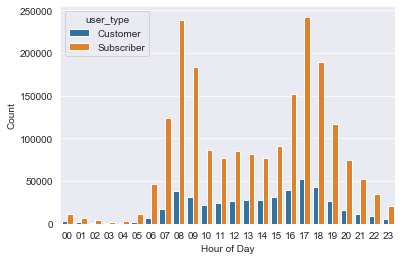

In [33]:
sb.countplot(data=df_clean, x='start_hourofday', hue='user_type');
plt.xlabel('Hour of Day');
plt.ylabel('Count');

Subscriber usage clearly peaks out on typical rush hours when people go to work in the morning and getting off work in the afternoon, double confirmed their usage purpose and goal of riding. Similar pattern was not observed among customers who tend to ride most in the afternoon or early evening as for a different purpose than the subscriber riders

Weekly usage between customers and subscribers:

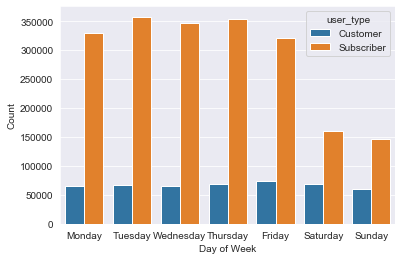

In [34]:
sb.countplot(data=df_clean, x='start_dayofweek', hue='user_type');
plt.xlabel('Day of Week');
plt.ylabel('Count');

There was much more subscriber usage than casual customers overall. The drop of volume on weekends for subscribers indicates that they primarily ride bikes for work commute during work days, whereas almost the opposite pattern of a slight increase of use for customers on weekends demonstrates that the use was more for leisure/touring and relaxing purposes.

Yearly usage between customers and subscribers:

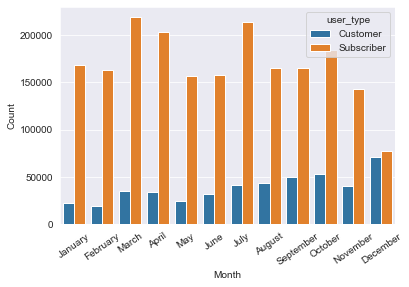

In [35]:
# Yearly usage between customers and subscribers:
sb.countplot(data=df_clean, x='start_month', hue='user_type');
plt.xticks(rotation=35);
plt.xlabel('Month');
plt.ylabel('Count');

The peaks for subscribers are in March, April, July, and October, with slightly increase during summer months. The customers numbers increase especially in December and in summer months.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> There are a lot more subscriber usage than customers. The riding habit/pattern varies a lot between subscribers and customers. Subscribers use the bike sharing system for work commnute thus most trips were on work days (Mon-Fri) and especially during rush hours (when going to work in the morning and getting off work in the afternoon), whereas customers tend to ride for fun in the afternoon or early evenings over weekends.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> March had the most bike riding usage for subscribers throughout the year

## Multivariate Exploration

How does the average trip duration vary in weekdays between customers and subscribers?

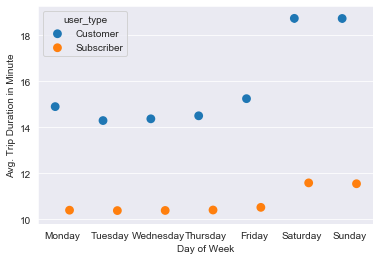

In [36]:
sb.pointplot(data=df_clean, x='start_dayofweek', y='duration_minute', hue='user_type', dodge=0.3, linestyles="");
plt.xlabel('Day of Week');
plt.ylabel('Avg. Trip Duration in Minute');

It can be seen from the above plot that subscribers ride much shorter/quicker trips compared to customers on each day of the week. Both user types have an obvious increase of trip duration on Saturdays and Sundays over weekends, especially for casual riders. Subscribers usage seems to be more efficient than customers overall and maintained a very consistent average duration Monday through Friday.

How does the hourly usage vary during weekdays for customers and subscribers?

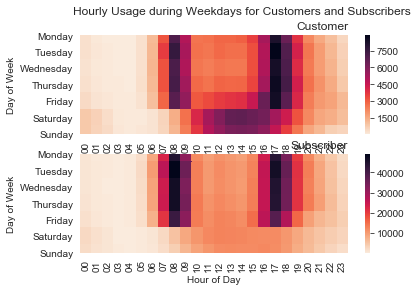

In [37]:
plt.suptitle('Hourly Usage during Weekdays for Customers and Subscribers')

plt.subplot(2, 1, 1)
customers = df_clean.query('user_type == "Customer"')
ct_counts = customers.groupby(['start_dayofweek', 'start_hourofday']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index='start_dayofweek', columns='start_hourofday', values='count')
sb.heatmap(ct_counts, cmap='rocket_r');
plt.title('Customer', loc='right');
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');

plt.subplot(2, 1, 2)
subscribers = df_clean.query('user_type == "Subscriber"')
st_counts = subscribers.groupby(['start_dayofweek', 'start_hourofday']).size()
st_counts = st_counts.reset_index(name='count')
st_counts = st_counts.pivot(index='start_dayofweek', columns='start_hourofday', values='count')
sb.heatmap(st_counts, cmap='rocket_r');
plt.title('Subscriber', loc='right');
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');

The heatmaps shows clearly very different usage pattern/habit between the two type of riders. Subscribers use the system heavily on work days i.e. Monday through Friday whereas customers ride a lot on weekends, especially in the afternoon. Many trips concentrated around 8-9am and 17-18pm on work days for subscribers when used for work commute, yet customers tend to use more in the late afternoon around 17pm Monday to Friday. Other than usage purpose and habit, it may also have to do with the traffic situation around these rush hours in the area.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The multivariate exploration strengthened some of the patterns discovered in the previous bivariate exploration as well as univariate exploration, the relationship between the multiple variables plotted are visualized altogether and information are presented combined. The efficient/short period of usage for subscribers corresponds to their high concentration on rush hours Monday through Friday, indicating the use is primarily for work commute. The more relaxing and flexible pattern of customer use shows that they're taking advantage of the bike sharing system quite differently from the subscribers, heavily over weekends and in the afternoon, for city tour or leisure purpose probably.

### Were there any interesting or surprising interactions between features?

> The interactions between features are all supplementing each other and quite make sense when looked at combined, there's no big surprise observed

### Resources
https://s3.amazonaws.com/baywheels-data/index.html

https://www.lyft.com/bikes/bay-wheels/system-data